<a href="https://colab.research.google.com/github/OzyMeister/NirfProject/blob/main/rankpred_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

 import pandas as pd

In [ ]:
data=pd.read_csv("/content/200samp.csv")

In [ ]:
data

,y,T,R,G,O,P
0,1,93.55,92.39,84.36,63.99,100.00
1,2,85.80,96.18,80.32,56.19,90.85
2,3,89.12,95.30,76.47,48.17,89.61
3,4,73.14,88.20,84.12,57.79,84.14
4,5,79.07,81.79,82.56,46.61,81.35
...,...,...,...,...,...,...
795,5,81.06,38.78,68.75,63.67,30.87
796,4,86.95,96.00,83.43,68.56,96.92
797,3,87.53,90.82,79.18,57.36,88.70
798,2,87.95,79.98,89.71,59.47,83.01


In [ ]:
x=data.drop(['y'],axis=1).values
y=data['y'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=ml.predict(x_test)
print(y_pred)

[ 76.4001543  109.96004856 136.10116351  73.63295222 139.77856312
  52.08359317 132.48951902  38.95088573  92.73385977 127.19930585
 138.92109842 103.58988308 114.81795323  52.94867519  60.41426341
 116.88027379  30.65832574 134.29170111 157.03296329  55.1453979
 118.58479835 112.80786254  98.79052457 146.91707237  97.42737767
  66.39857944  99.00264103  69.31498752  85.18971928 132.66919966
  69.33074328 -41.35082872   2.09478946 144.98446356 168.49164856
 112.29253528 133.2903252  115.71637357  92.96043853  57.6324962
 129.61648681 115.06512354  42.17900663  77.12729119  28.7629673
 129.39700013 113.93692542  67.33946405 133.33102375  61.53116988
  34.95652947 100.3483835   94.62343412 129.75311519 111.72145194
  31.20186739 126.22925141 170.37559379  93.91169198 128.63802017
 124.06418209  73.98595859 135.38749389  42.57823228 153.03691441
 135.39053018 180.01113367 185.66905334  56.25092073 119.39616481
 147.03826747 106.02795416 124.43984476  74.78500457  24.8012232
 181.78159026 

In [ ]:
lst = []  
for i in range(0, 5):
    print('Enter all attributes ' + str(i+1))
    ele = int(input())  
    lst.append(ele)      
print("Input Attributes : " ,lst)
out = [round(item) for item in ml.predict([lst])]
print("Predicted Rank : " ,out)

Enter all attributes 1
56
Enter all attributes 2
55
Enter all attributes 3
90
Enter all attributes 4
56
Enter all attributes 5
54
Input Attributes :  [56, 55, 90, 56, 54]
Predicted Rank :  [84]


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.723081530843674

Text(0.5, 1.0, 'Actual vs Predicted')

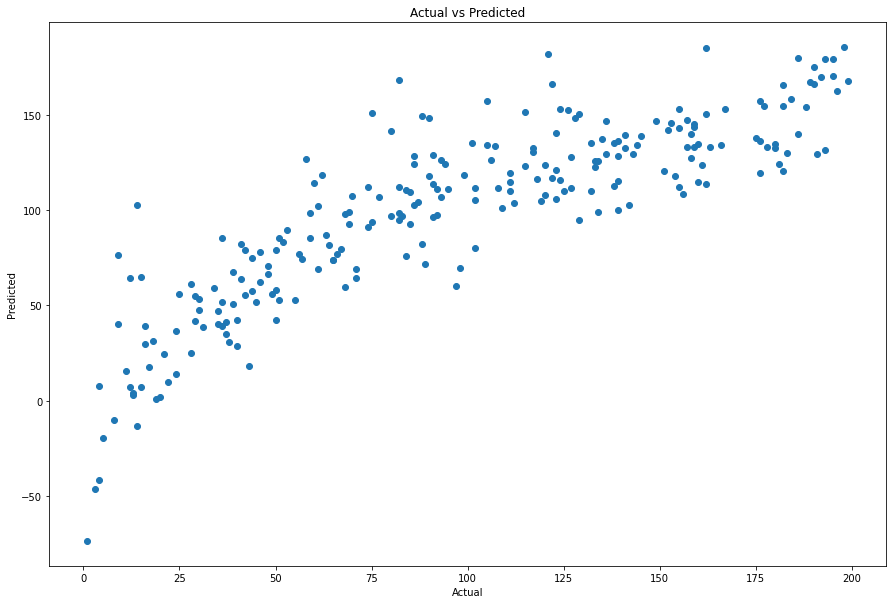

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

In [ ]:
ml.score(x_test,y_test)

0.723081530843674

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ml,x_train,y_train,scoring='r2', cv=5)
scores

array([0.66059113, 0.75707736, 0.77371999, 0.71468002, 0.71856541])

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(x_train,y_train)
neigh.score(x_test,y_test)

0.5823261238967217

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
sregr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
sregr.fit(x_train,y_train)
sregr.score(x_test,y_test)

0.6490407731492462

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(x_train,y_train)
regr.score(x_test,y_test)

0.6601322823725267

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train,y_train)
regressor.score(x_test,y_test)

0.47108211212009954